In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from  matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set()
from glob import glob
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.figsize'] = [8, 6]

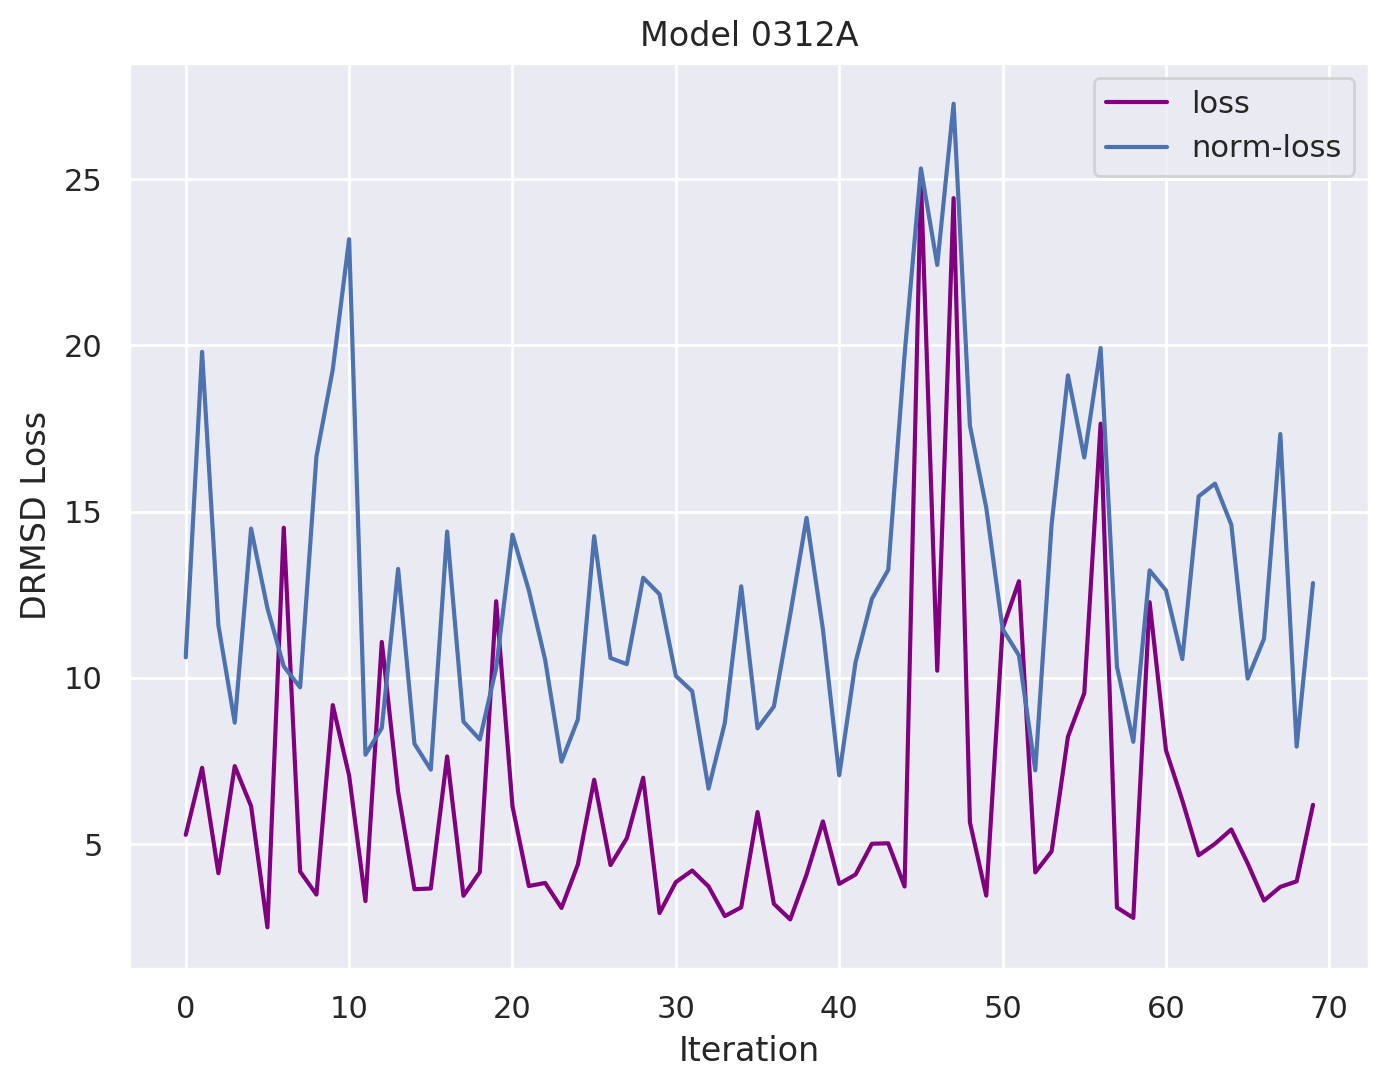

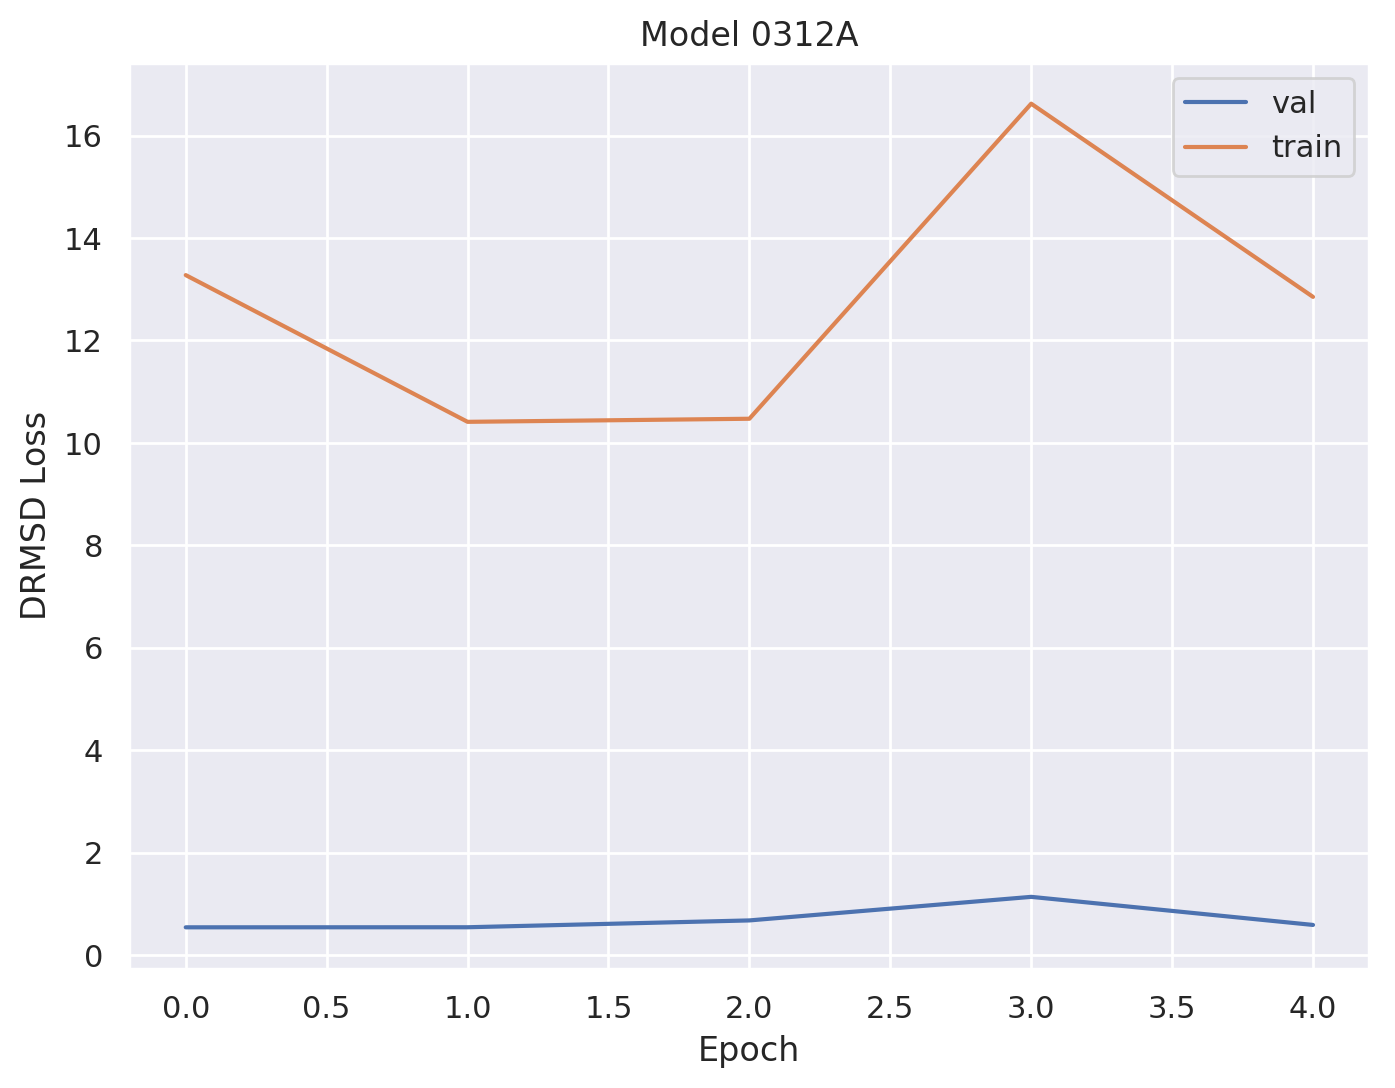

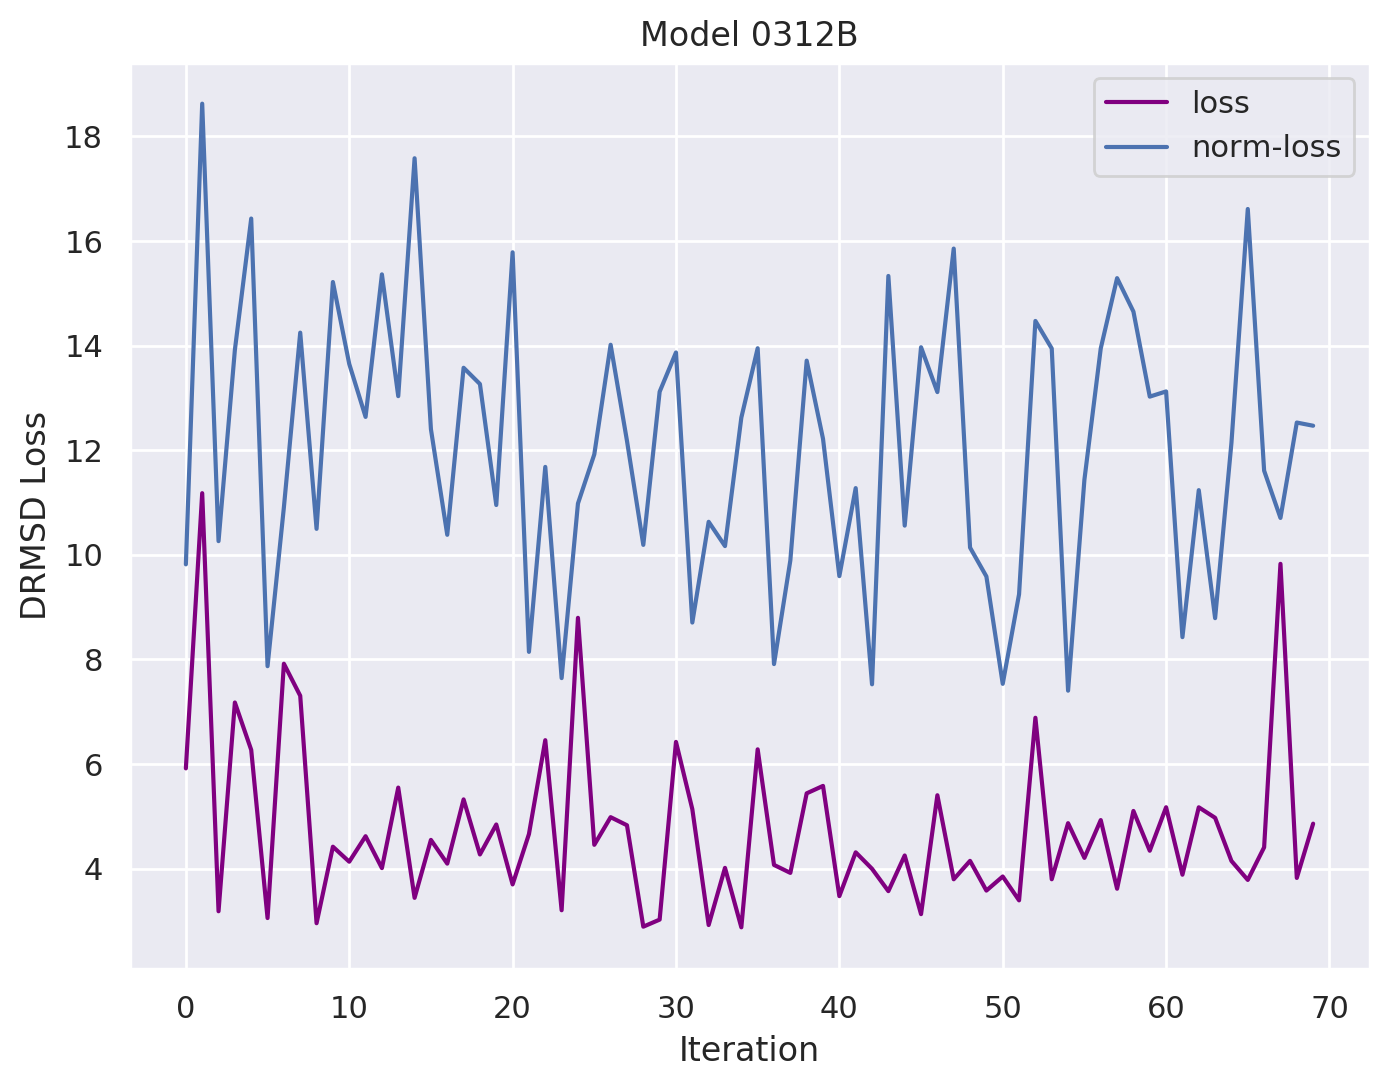

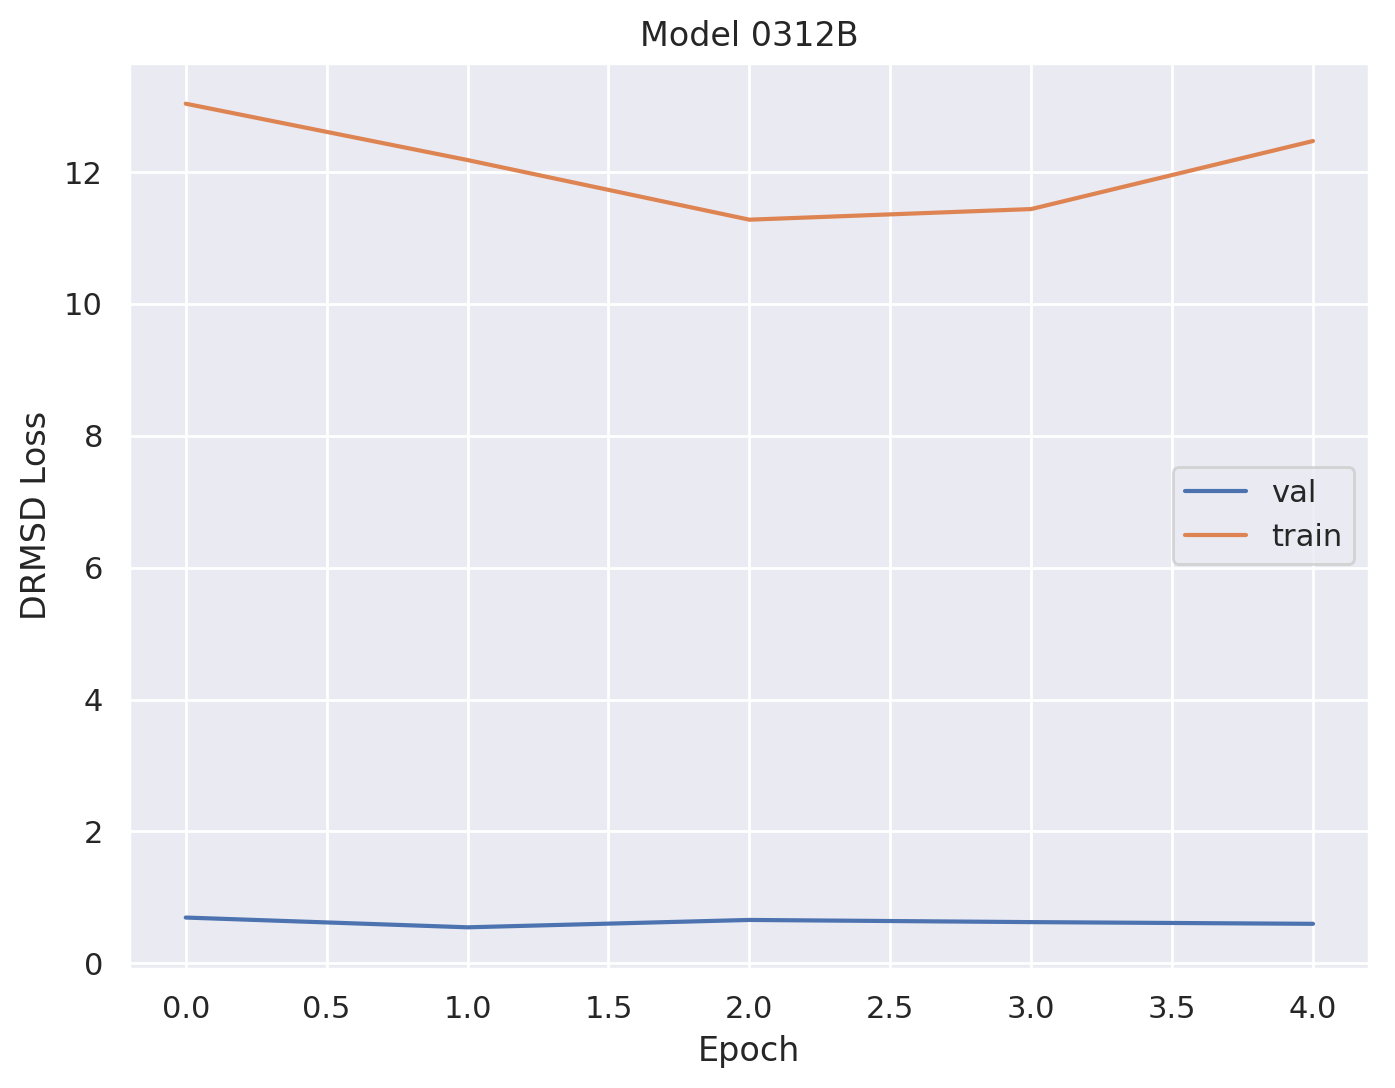

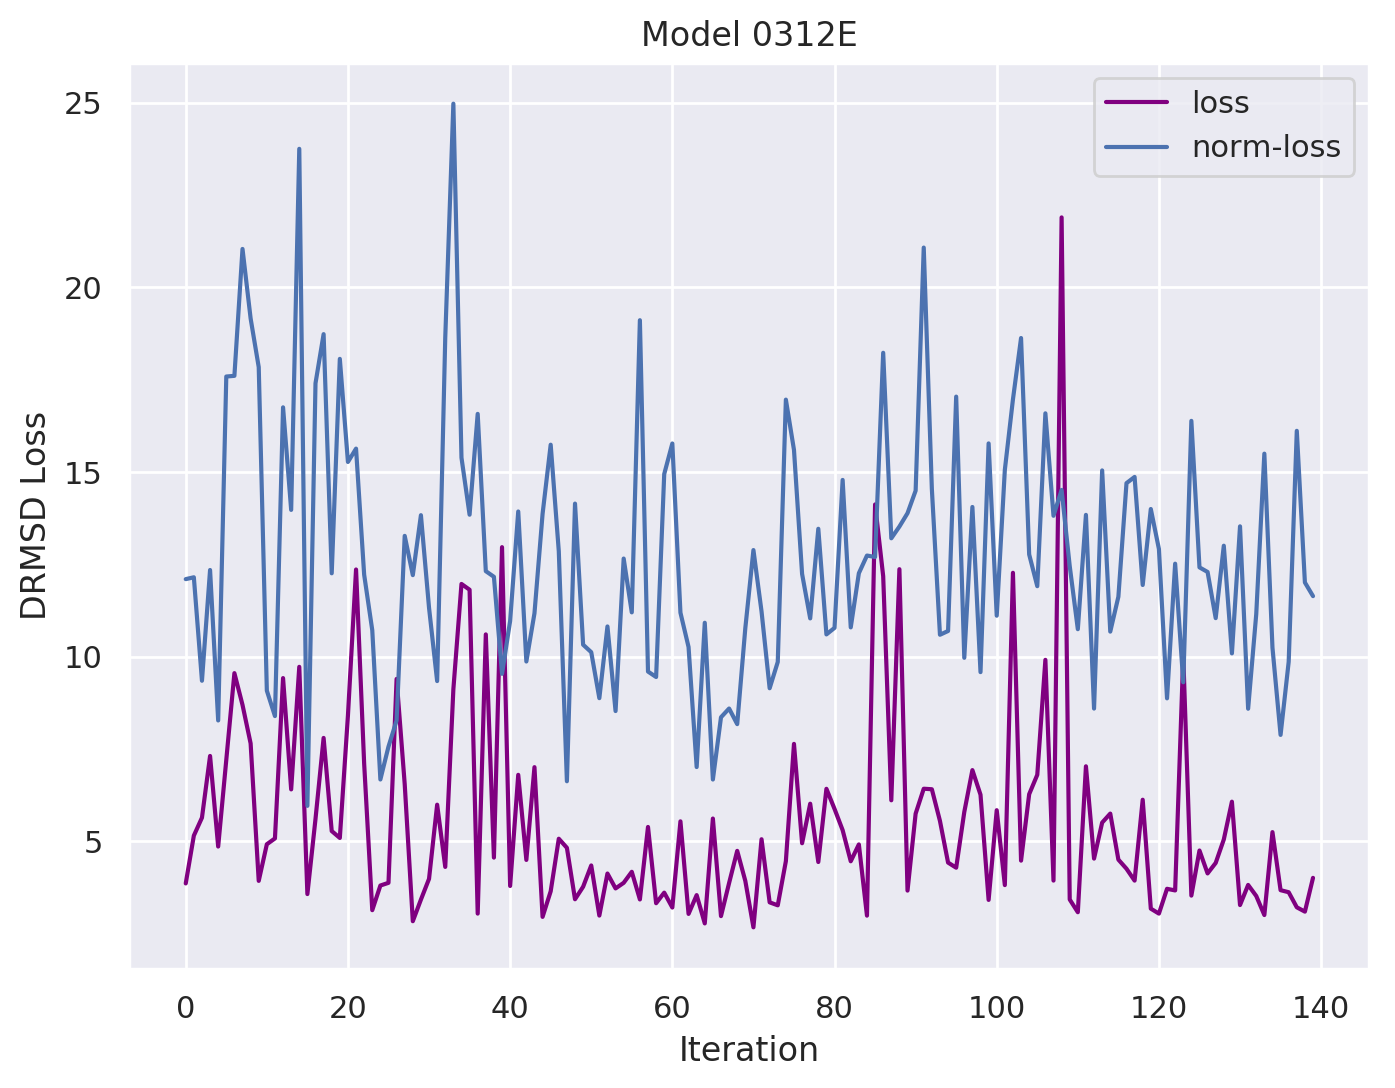

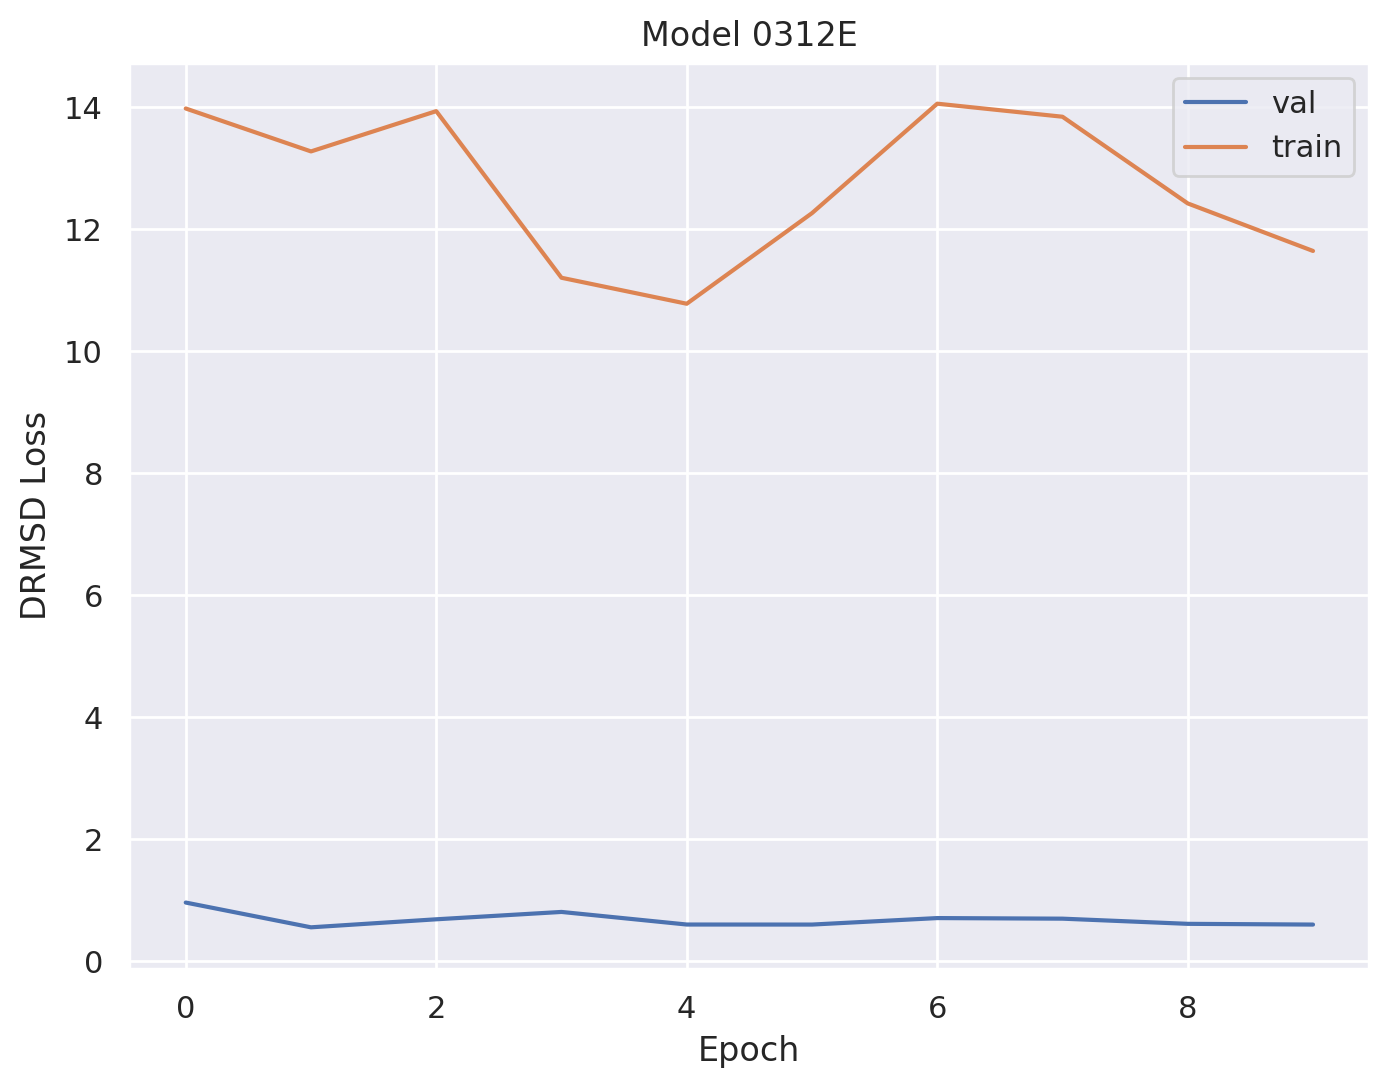

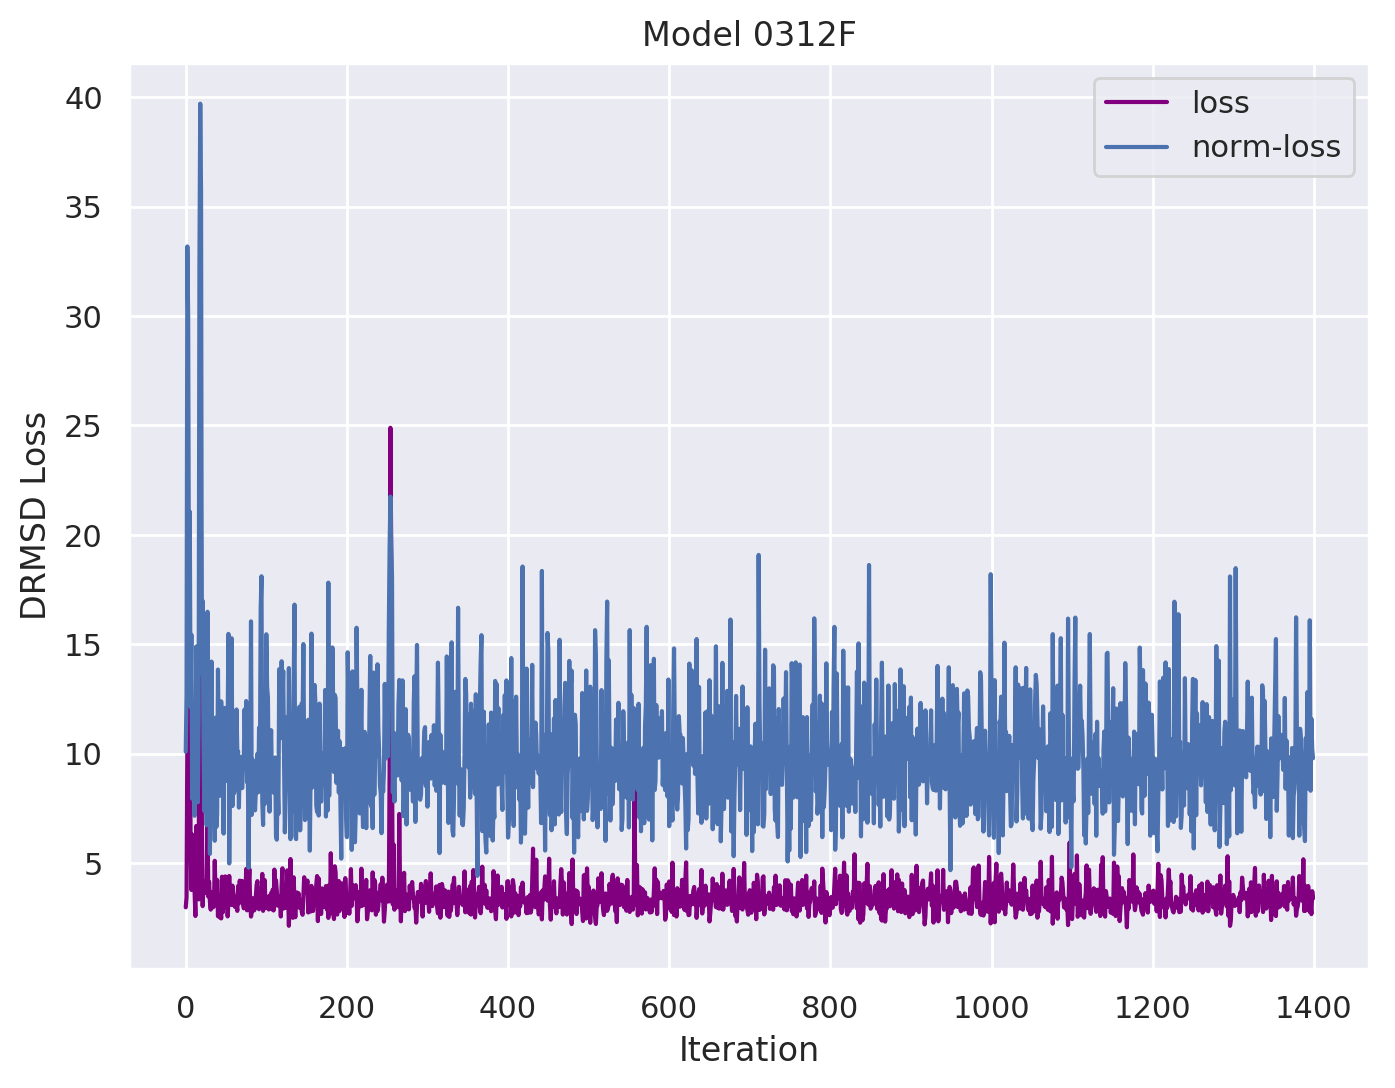

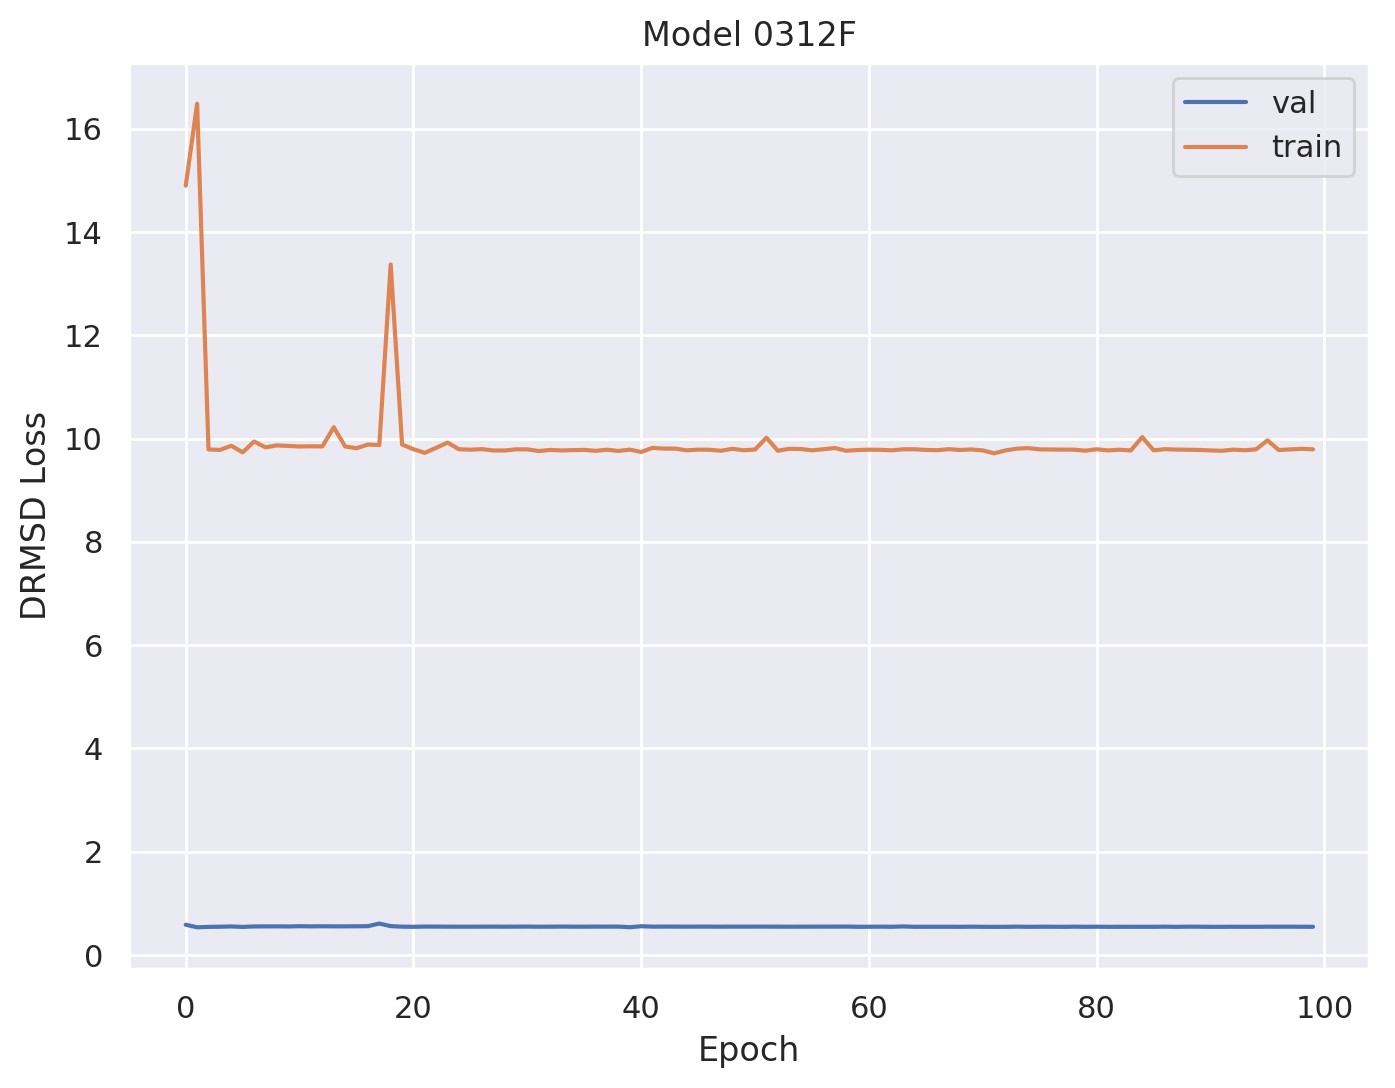

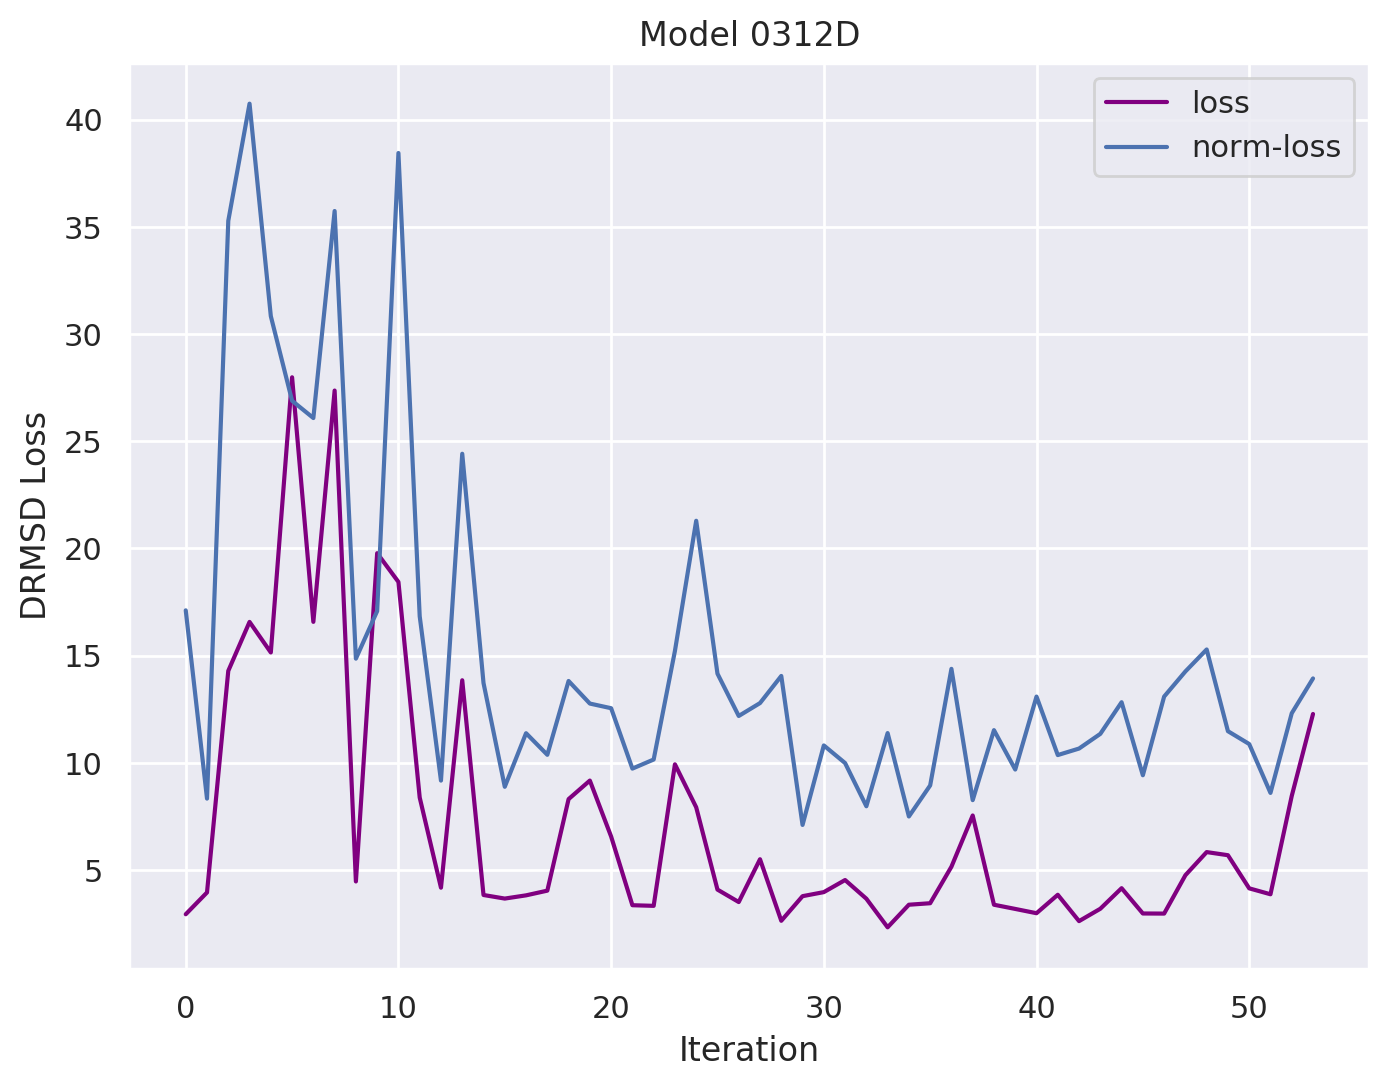

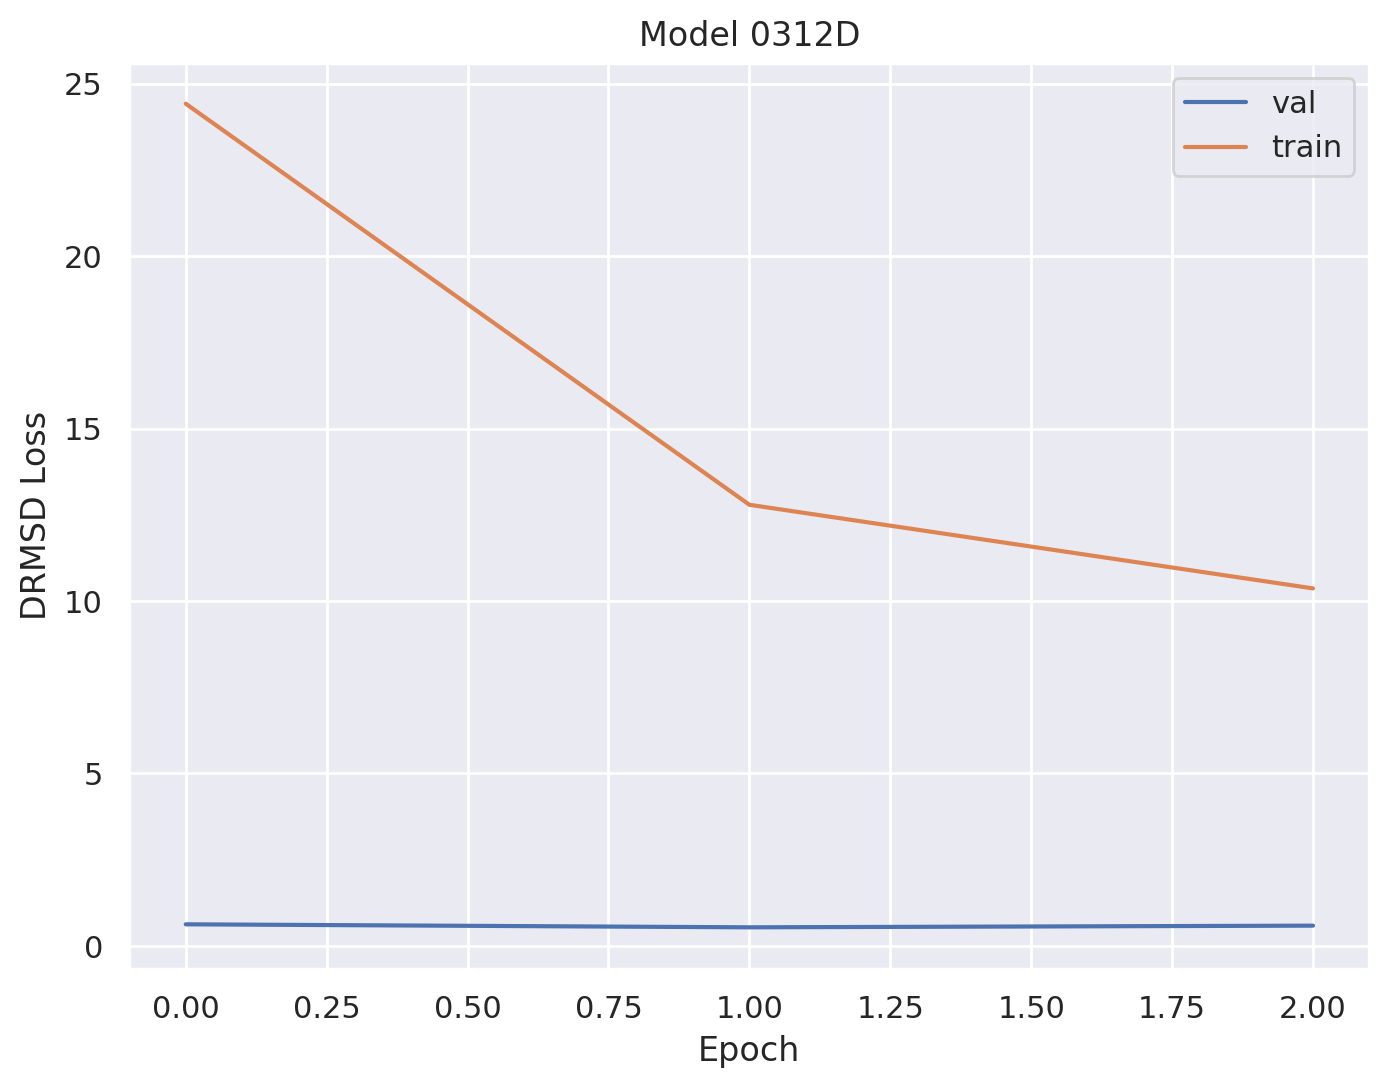

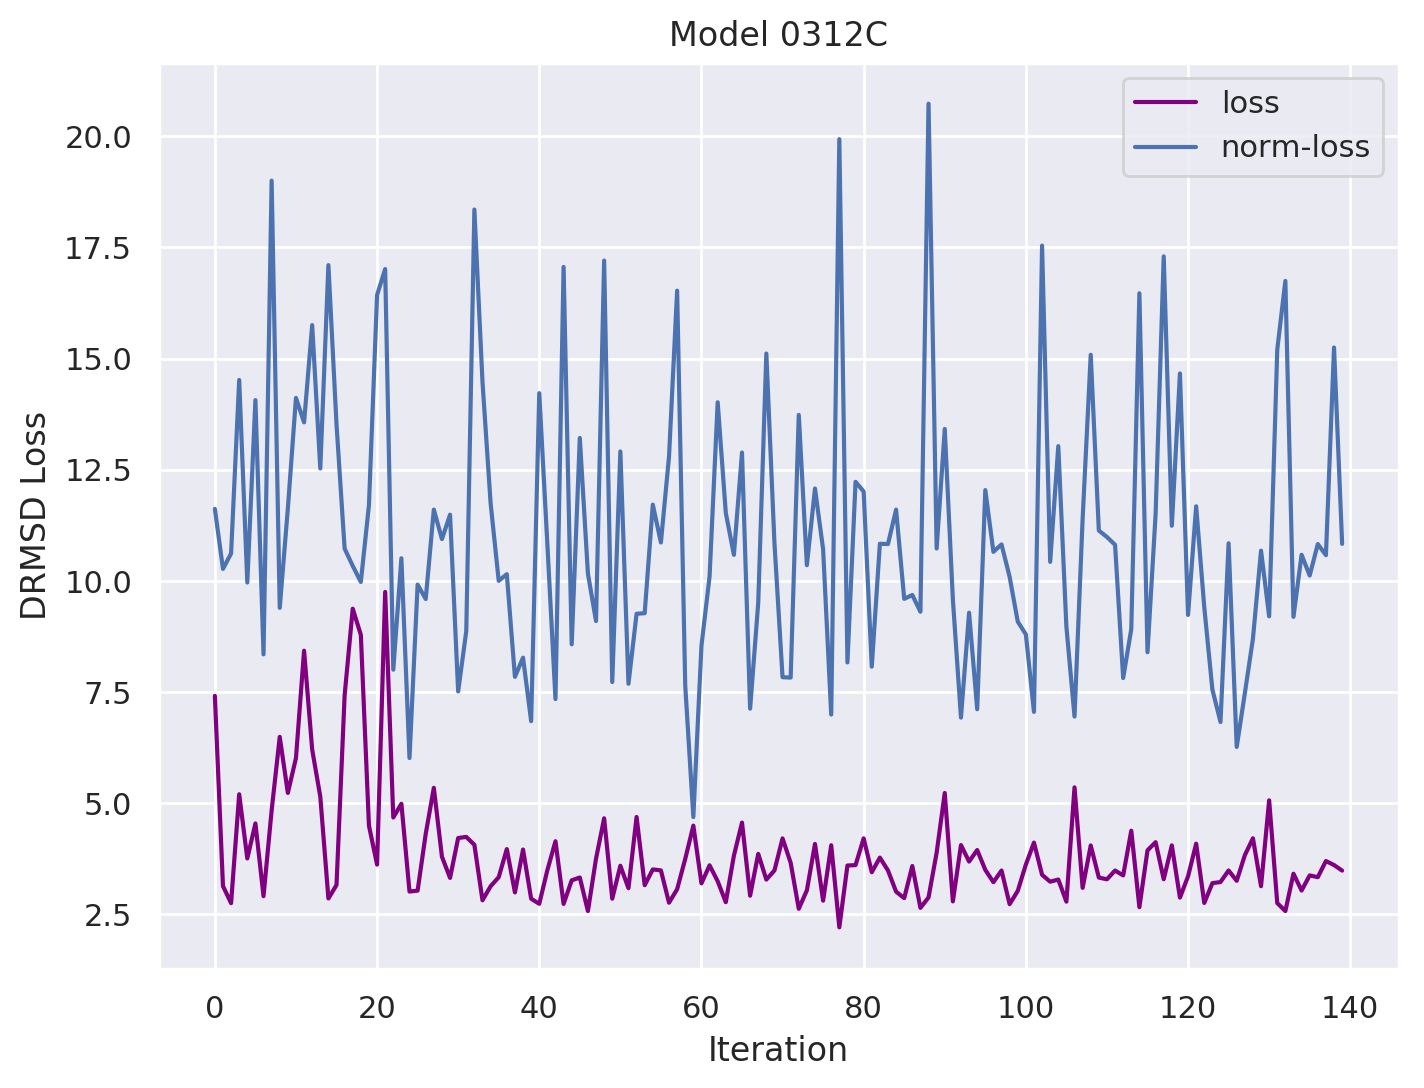

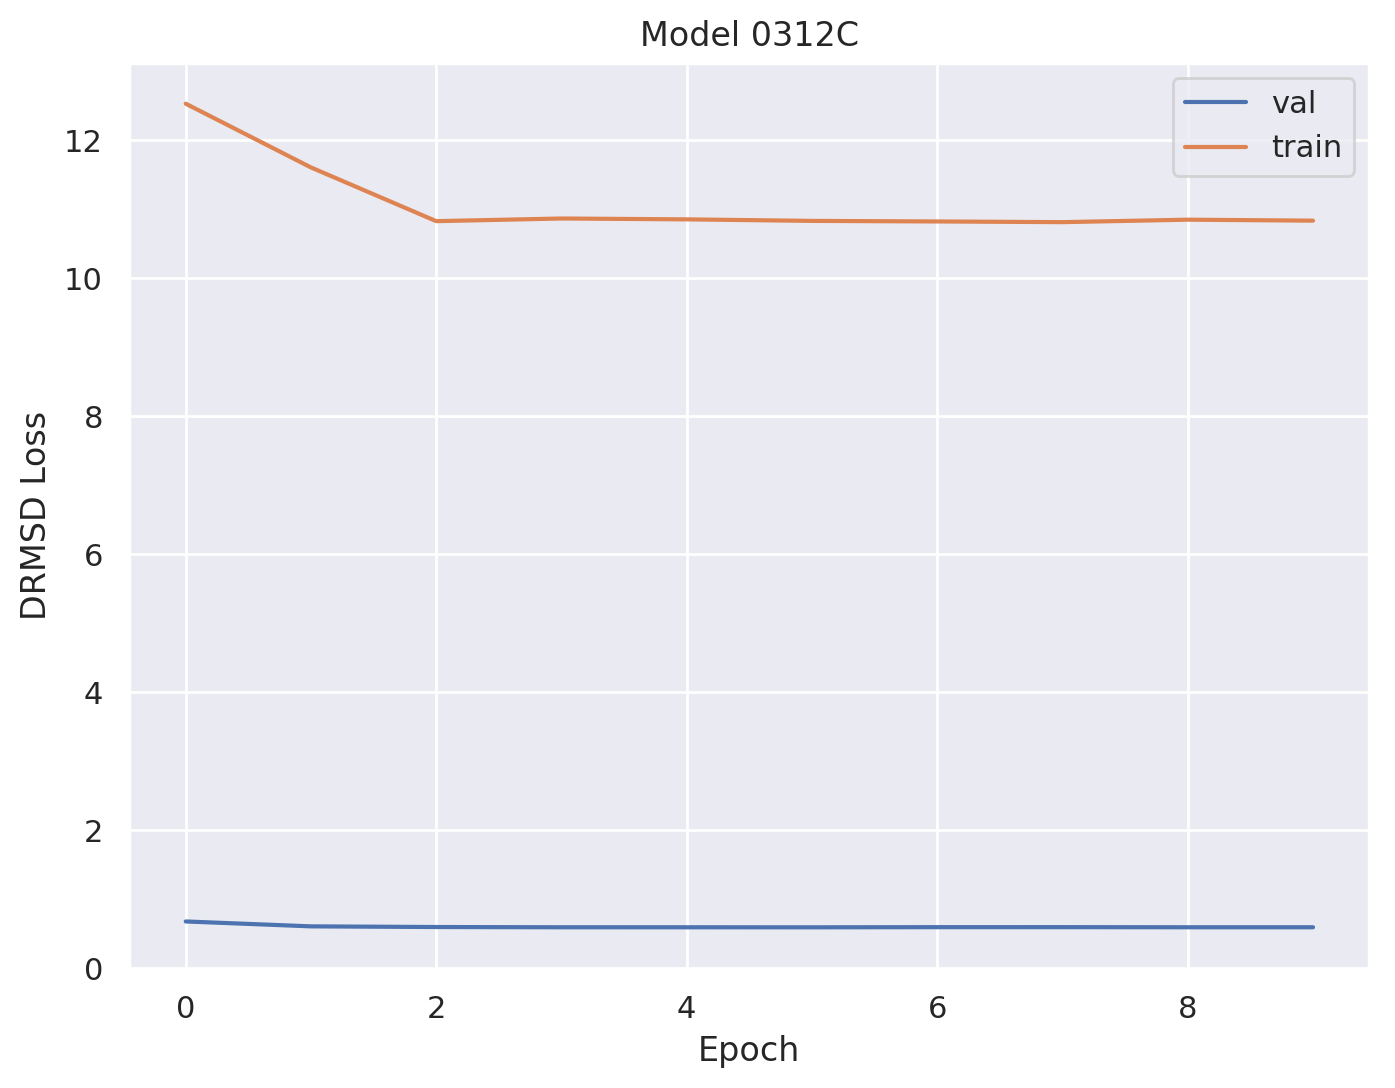

<Figure size 1600x1200 with 0 Axes>

In [70]:
train_logs = glob("../logs/*.train")
train_log_dfs = []
for tl in train_logs:
    df = pd.read_csv(tl)
    mname = tl.split("/")[-1][:-6]
    plot_batch_loss(df, "Model "+ mname)
    plt.figure()
    plot_epoch_loss(df, "Model "+ mname)
    plt.figure()

In [63]:
def plot_batch_loss(df, mname=""):
    x = range(len(df[df.is_val == False]["loss"]))
    sns.lineplot(x=x, y=df[df.is_val == False]["loss"], label="loss", color="purple")
    sns.lineplot(x=x, y=df[df.is_val == False]["nloss"], label="norm-loss")
    plt.xlabel("Iteration")
    plt.ylabel("DRMSD Loss")
    if mname != "":
        plt.title(mname)
    plt.legend()

In [51]:
def plot_epoch_loss(df, mname=""):
    val_epoch_loss = df[df.is_val == True]["nloss"]
    train_epoch_loss = df[(df.is_end_of_epoch == True) & (df.is_val == False)]["nloss"]
    plt.plot(range(len(val_epoch_loss)), val_epoch_loss, label="val")
    plt.plot(range(len(val_epoch_loss)), train_epoch_loss, label="train")
    plt.xlabel("Epoch")
    plt.ylabel("DRMSD Loss")
    if mname != "":
        plt.title(mname)
    plt.legend()


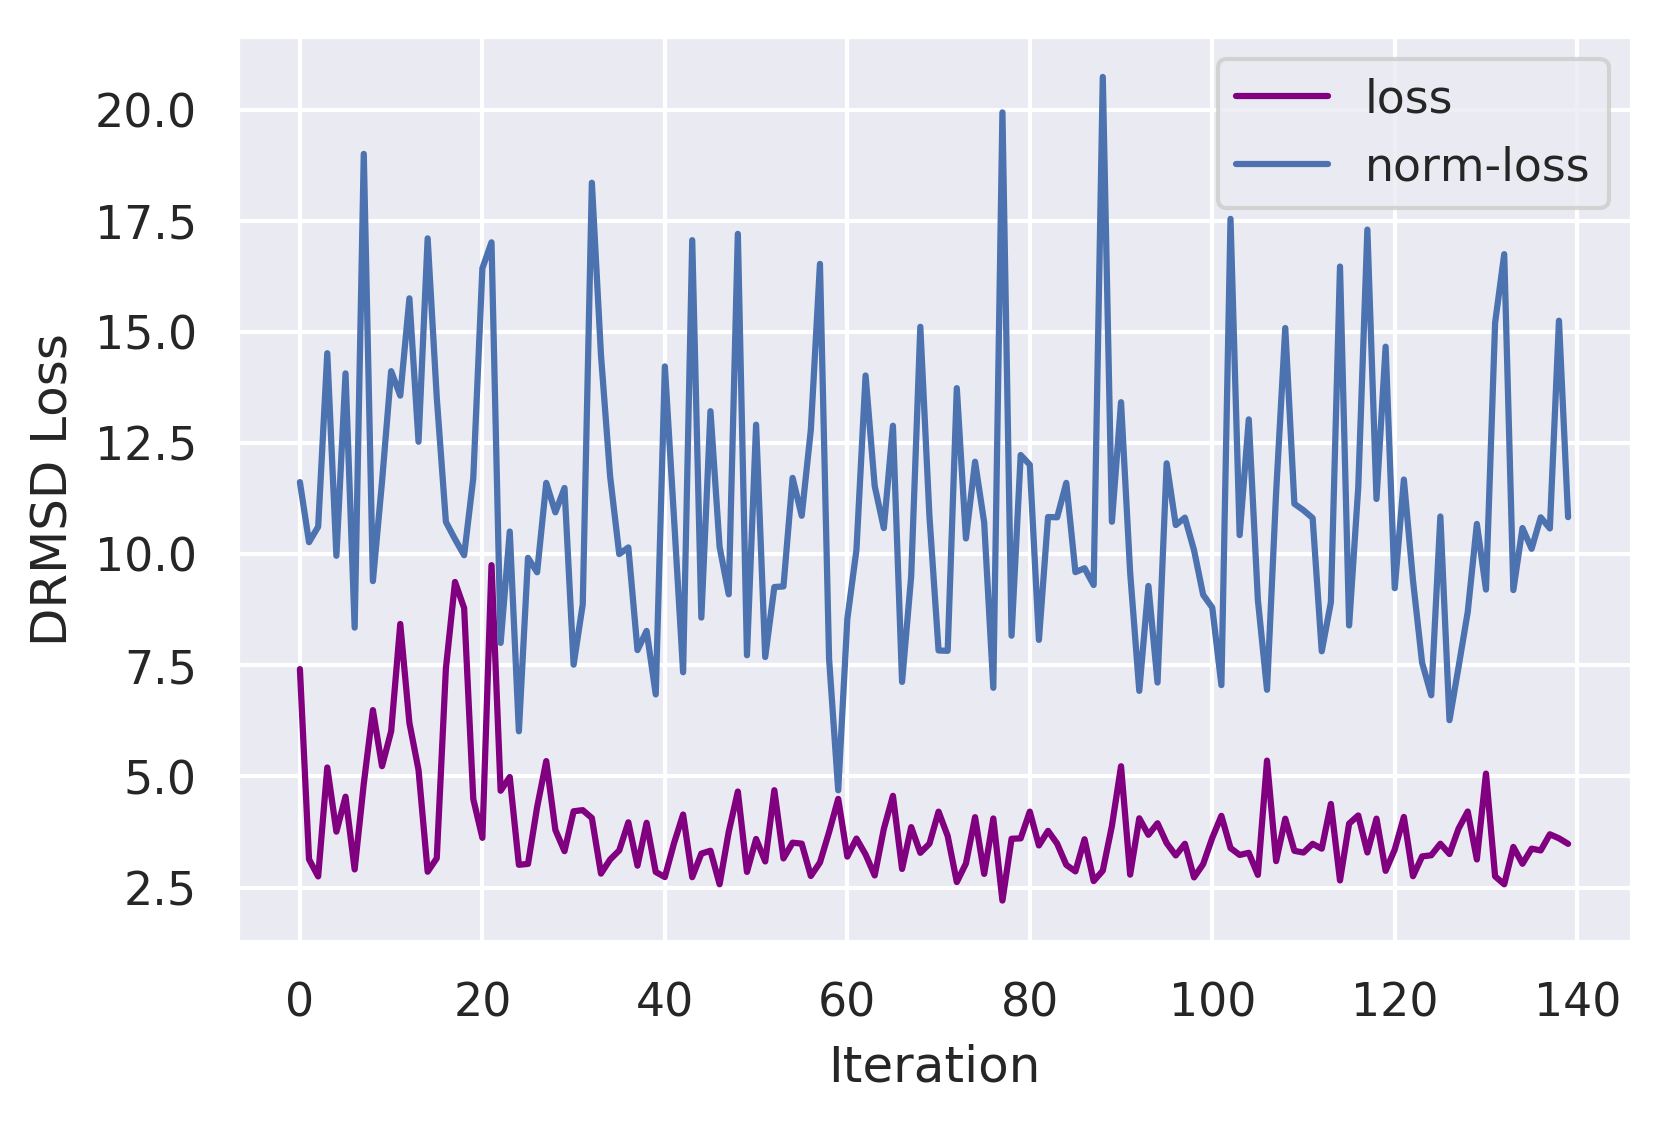

In [64]:
plot_batch_loss(df)

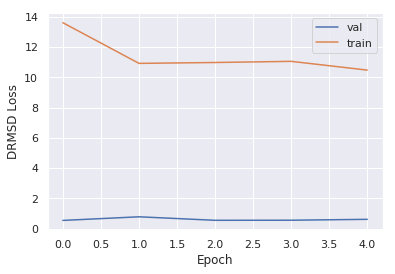

In [49]:
plot_epoch_loss(df)